<a href="https://colab.research.google.com/github/pedro-varela1/Arquivos_ELE-606/blob/main/Atividade_8_naivebayes_ELE606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação com Naive Bayes
## ELE606 - Tópicos Especiais em Inteligência Artificial

> Aluno: [Pedro Artur Varela](https://github.com/pedro-varela1)

<img src="https://th.bing.com/th/id/OIP.ZPnmAh8kZslRizhzkJCZGAHaDt?rs=1&pid=ImgDetMain"
    style="width:500px; float: right; margin: 0 40px 40px 40px;"></img>
  
![divider](https://webstockreview.net/images/divider-clipart-design-line-5.png)



## Introdução

O classificador Naive Bayes, um algoritmo popular e extremamente claro, assume que todos os recursos são independentes uns dos outros para simplificar o cálculo.

MNIST é um dos conjuntos de dados amplamente utilizados. Contém 60.000 imagens para treinamento e 10.000 imagens para validação. Cada imagem contém um dígito manuscrito de 0 a 9. A tarefa é classificar cada imagem no dígito correspondente. Cada imagem é uma imagem em tons de cinza com largura e altura de 28 com formato (28, 28, 1).

---

## Algoritmo e código

### Pré-processamento dos dados

Primeiramente, vamos importar os módulos utilizados.

In [ ]:
import torch    # Modelagem
from torchvision import datasets, transforms    # Carregar Datset e Tranformations
from sklearn.naive_bayes import GaussianNB    # Treinamento do Modelo
from sklearn.metrics import accuracy_score    # Medicao de Acuracia
import matplotlib.pyplot as plt   # Visualization

Vamos carregar a base de dados, vetorizar e normalizá-la.

In [ ]:
# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Vamos visualizar alguns dados que vão ser utilizados no treinamento.

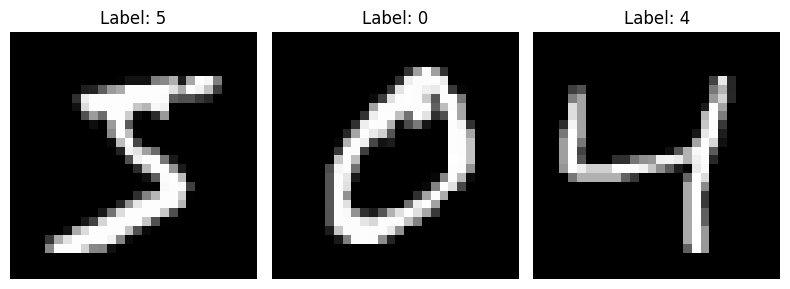

In [ ]:
# Display the first 3 images from the MNIST training dataset
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

for i in range(3):
    axs[i].imshow(train_loader.dataset.data[i], cmap='gray')
    axs[i].set_title(f"Label: {train_loader.dataset.targets[i]}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

Vamos preparar os dados.

In [ ]:
# Prepare data
train_data = train_loader.dataset.data.numpy().reshape(-1, 28*28)
train_labels = train_loader.dataset.targets.numpy()

test_data = test_loader.dataset.data.numpy().reshape(-1, 28*28)
test_labels = test_loader.dataset.targets.numpy()

### Treinamento do Modelo

In [ ]:
# Fit Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(train_data, train_labels)

GaussianNB()

### Análise dos Resultados

Primeiramente, vamos fazer a previsão da acurácia.

In [ ]:
# Predict and calculate accuracy
predictions = gnb.predict(test_data)
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 55.58%


A acurácia foi muito baixa, vamos ver algumas predições.

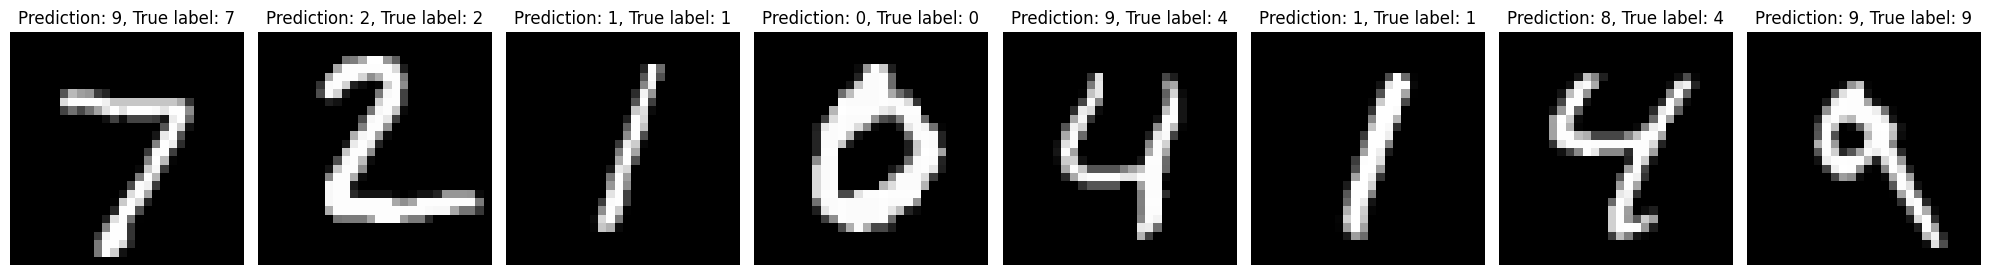

In [ ]:
# Display the first 8 images from the test set with predictions
fig, axs = plt.subplots(1, 8, figsize=(20, 3))

for i in range(8):
    axs[i].imshow(test_data[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(f"Prediction: {predictions[i]}, True label: {test_labels[i]}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

Vê-se uma acurácia muito pequena, isso acontece porque o classificador Gaussian Naive Bayes pode não ser a melhor escolha para o conjunto de dados MNIST, pois assume independência entre recursos, o que não é válido para dados de imagem.